In [2]:
import numpy as np
from matplotlib . pyplot import *
from astropy.io import fits
import pandas as pd

In [3]:
file = '/home/gauravbhoir147/Documents/Files/Practicals/ISM/ISM1/Quasar absorption line spectroscopy/J010104-285801.fits'
HDUList = fits.open(file)
HDUList.info()
HDUList[0].header
HDUList[2].header

# Extract the header and data from the primary HDU
header = HDUList[0].header
data = HDUList[0].data

# Extract the necessary header values for wavelength calibration
crval1 = header['CRVAL1']
crpix1 = header['CRPIX1']
cd1_1 = header['CD1_1']
flux = header['ARRAY1']
z = (5605.125/1526.70698)-1 #redshift calculation
wl = 1215.6701*(1+z)
print(wl)
# Determine the number of pixels
npix = data.shape[1]

# Compute the wavelength array
i = np.arange(npix)
w0 = 10**crval1  # Central wavelength of the first pixel in linear scale
w = w0*10**((np.arange(npix) + 1 - crpix1) * cd1_1)

Filename: /home/gauravbhoir147/Documents/Files/Practicals/ISM/ISM1/Quasar absorption line spectroscopy/J010104-285801.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   (138484, 9)   float64   
  1  CombinedSpecInfo    1 BinTableHDU     30   391R x 7C   [1D, 1D, 1D, 1D, 1D, 1D, 1D]   
  2  WavelengthCoverage    1 BinTableHDU     15   56R x 2C   [1D, 1D]   
  3  ExposureInfo    1 BinTableHDU    175   29R x 55C   [72A, 72A, 72A, 72A, 72A, 72A, 1I, 64A, 64A, 1K, 1I, 15A, 64A, 64A, 64A, 64A, 64A, 64A, 8A, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1K, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 15A, 1D, 1D, 1D, 1D, 1K, 1D, 1D, 1J, 1D, 1D]   
4463.189700791504


In [4]:
def plot_spectrum(w, flux, x, Element, xs=None, xm=None, ys=None, ym=None,cut_y=2):
    """
    Plot spectroscopic data.

    Parameters:
    - w (array-like): Array of wavelengths.
    - flux (array-like): Array of flux values.
    - x (float): Wavelength at which to draw the vertical line.
    - Element (str): Label for the vertical line.
    - xs (float, optional): Minimum value for x-axis limit.
    - xm (float, optional): Maximum value for x-axis limit.
    - ys (float, optional): Minimum value for y-axis limit.
    - ym (float, optional): Maximum value for y-axis limit.
    """
    figure(figsize=(10, 6))
    plot(w, flux, label='Spectrum')
    vlines(x=x, ymin=0, ymax=cut_y, color='black')
    annotate(f'{Element} at {x/(1+z):e} A', xy=(x, cut_y),rotation=90,verticalalignment='center')
    xlabel('Wavelength')
    ylabel('Flux')
    title('Spectroscopic Data')
    legend()
    grid(True)
    
    # Set xlim if provided
    if xs is not None and xm is not None:
        xlim(xs, xm)
    
    # Set ylim if provided
    if ys is not None and ym is not None:
        ylim(ys, ym)


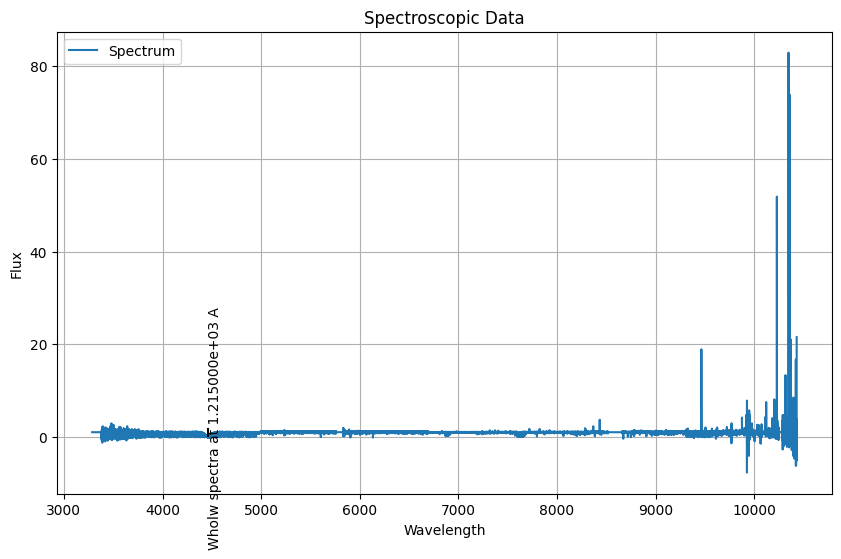

In [12]:
X = 1215
x = X*(1+z)
plot_spectrum(w,data[0],x,"Wholw spectra")

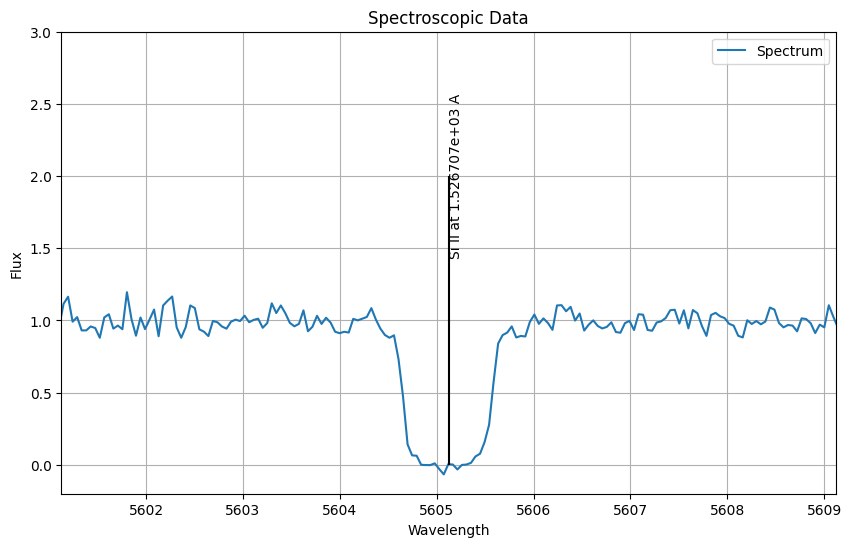

In [6]:
X = 1526.70698
x = X*(1+z)
plot_spectrum(w,data[0],x,'Si II',x-4,x+4,-0.2,3)

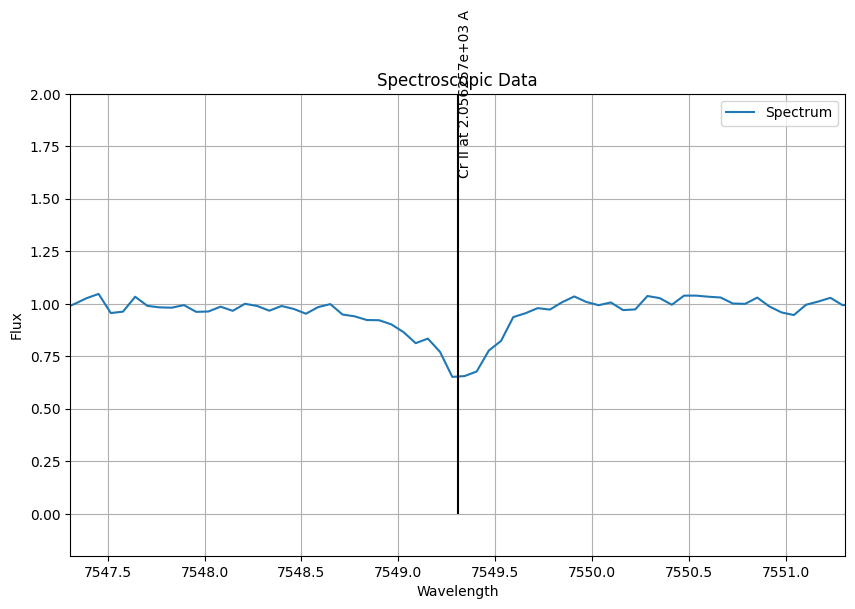

In [7]:
X = 2056.25693
x = X*(1+z)
plot_spectrum(w,data[0],x,'Cr II',x-2,x+2,-0.2,2)

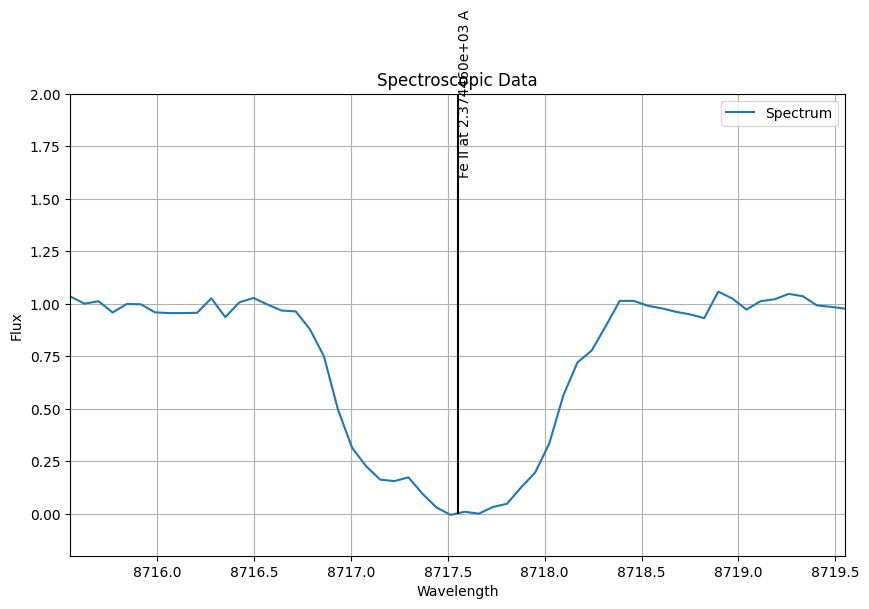

In [8]:
X = 2374.46
x = X*(1+z)
plot_spectrum(w,data[0],x,'Fe II',x-2,x+2,-0.2,2)